In [106]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
% matplotlib inline

In [107]:
# read csv
sms_demo = pd.read_csv('C:\\Users\\rachit\\PycharmProjects\\CS309-IR-Monsoon-2017-RR\\spamtest.csv', encoding='latin-1')
sms = pd.read_csv('C:\\Users\\rachit\\PycharmProjects\\CS309-IR-Monsoon-2017-RR\\spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms_demo = sms_demo.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms_demo.head(10)


,class,message
0,ham,LOL we will party at night
1,spam,Win a $10000 jackpot. Call now
2,ham,Yes I am watching netflix
3,ham,I am going to school tomorrow
4,spam,you have won a lottery ticket. call and claim ...
5,spam,Winner! You have been rewarded with a gift cou...


In [108]:
# make a copy of message column
text_feat_demo = sms_demo['message'].copy()
text_feat = sms['message'].copy()
text_feat_demo.head()

0                           LOL we will party at night
1                       Win a $10000 jackpot. Call now
2                            Yes I am watching netflix
3                        I am going to school tomorrow
4    you have won a lottery ticket. call and claim ...
Name: message, dtype: object

## Preprocessing


In [109]:
# remove stop words, punctuation and do stemming
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
        stemmer = SnowballStemmer("english")
        words += (stemmer.stem(i)) + " "
    return words


In [110]:
text_feat = text_feat.apply(text_process)
text_feat_demo = text_feat_demo.apply(text_process)
text_feat_demo.head()

## Vectorization: turning a collection of text documents into numerical feature vectors.
## Also known as Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [77]:
# extract features

# tokenizing strings and giving an integer id for each possible token

# counting the occurrences of tokens in each document.

# normalizing and weighting with diminishing importance tokens that occur 
# in the majority of samples / documents.

vectorizer = TfidfVectorizer("english")
vectorizer_demo = TfidfVectorizer("english")


In [78]:
# tokenize string
analyze = vectorizer_demo.build_analyzer()
print(analyze(text_process("SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info")))

['six', 'chanc', 'win', 'cash', '100', '20000', 'pound', 'txt', 'csh11', 'send', '87575', 'cost', '150pday', '6day', '16', 'tsandc', 'appli', 'repli', 'hl', 'info']


In [105]:
# features extracted
features = vectorizer.fit_transform(text_feat)
features_demo = vectorizer_demo.fit_transform(text_feat_demo)
print(vectorizer_demo.get_feature_names())


['10000', 'call', 'claim', 'coupon', 'day', 'gift', 'go', 'jackpot', 'lol', 'lotteri', 'netflix', 'night', 'parti', 'prize', 'reward', 'school', 'ticket', 'tomorrow', 'valid', 'watch', 'win', 'winner', 'yes']


In [80]:
# token-tfidf matrix for 1st sms
# features and their corresponding tf-df values
print(features_demo.toarray())


[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.57735027  0.          0.          0.57735027  0.57735027
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.52182349  0.42790272  0.          0.          0.          0.          0.
   0.52182349  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.52182349  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.57735027  0.          0.          0.
   0.          0.          0.          0.          0.          0.57735027
   0.          0.          0.57735027]
 [ 0.          0.          0.          0.          0.          0.
   0.57735027  0.          0.          0.          0.          0.          0.
   0.          0.          0.57735027  0.          0.5773

In [81]:
# matrix with 1 row per sms and 1 column per token
# Each term found by the analyzer during the fit is assigned a unique integer index 
# corresponding to a column in the resulting matrix. 
print(features_demo)


  (0, 8)	0.57735026919
  (0, 12)	0.57735026919
  (0, 11)	0.57735026919
  (1, 20)	0.521823488025
  (1, 0)	0.521823488025
  (1, 7)	0.521823488025
  (1, 1)	0.427902724969
  (2, 22)	0.57735026919
  (2, 19)	0.57735026919
  (2, 10)	0.57735026919
  (3, 6)	0.57735026919
  (3, 15)	0.57735026919
  (3, 17)	0.57735026919
  (4, 1)	0.379358946687
  (4, 9)	0.462624791156
  (4, 16)	0.462624791156
  (4, 2)	0.462624791156
  (4, 13)	0.462624791156
  (5, 21)	0.408248290464
  (5, 14)	0.408248290464
  (5, 5)	0.408248290464
  (5, 3)	0.408248290464
  (5, 18)	0.408248290464
  (5, 4)	0.408248290464


In [82]:
# split features to test and training set
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['class'], test_size=0.3,
                                                                            random_state=111)

In [83]:
# import some classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## test various parameters for classifiers

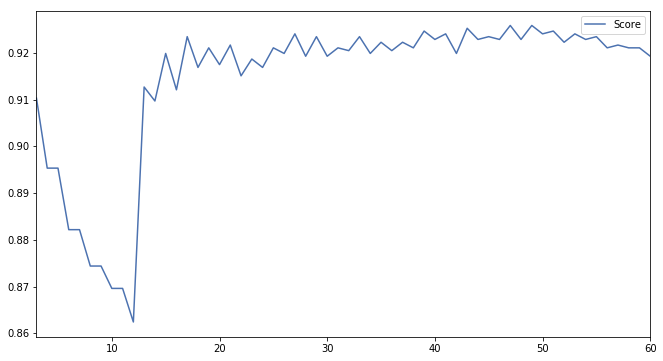

In [84]:
# K-Neighbours Classifier

# test for optimal n neighbours
pred_scores = []

for i in range(3, 61):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test, pred)]))
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.plot(figsize=(11, 6))


In [85]:
df[df['Score'] == df['Score'].max()]

,Score
47,0.925837
49,0.925837


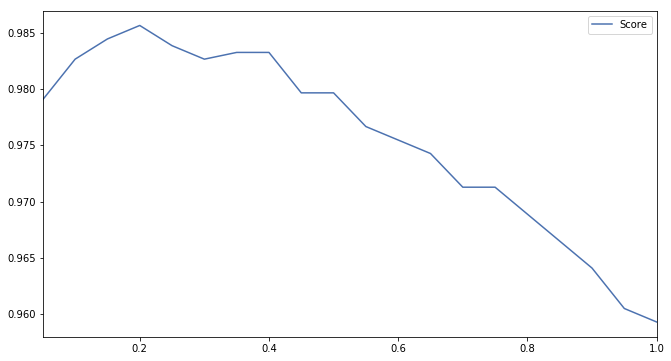

In [86]:
# Multinominal NaiveBayes Classifier

pred_scores = []
for i in np.linspace(0.05, 1, num=20):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(features_train, labels_train)
    pred = mnb.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test, pred)]))
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.plot(figsize=(11, 6))


In [87]:
df[df['Score'] == df['Score'].max()]

,Score
0.2,0.985646


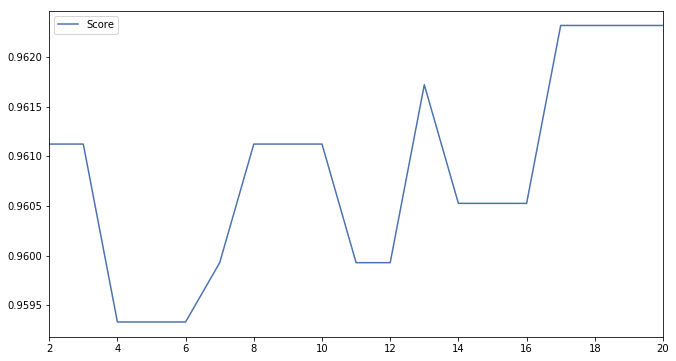

In [88]:
# decision tree classifier
pred_scores = []
for i in range(2, 21):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(features_train, labels_train)
    pred = dtc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test, pred)]))
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.plot(figsize=(11, 6))


In [89]:
df[df['Score'] == df['Score'].max()]

,Score
17,0.962321
18,0.962321
19,0.962321
20,0.962321


In [90]:
# initialize classifiers with optimal parameters obtained from above
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)


In [91]:
# make classifer dictionary
clfs = {'KN': knc, 'NB': mnb, 'DT': dtc}


In [92]:
# functions to fit our classifiers and make predictions
def train_classifier(clf, feature_train, labels_train):
    clf.fit(feature_train, labels_train)

def predict_labels(clf, features):
    return (clf.predict(features))


In [93]:
# iterate through classifiers and save the results
pred_scores = []
for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))


In [94]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

,Score
KN,0.925837
NB,0.985646
DT,0.959928


## best classifier: MultinomialNaiveBayes 

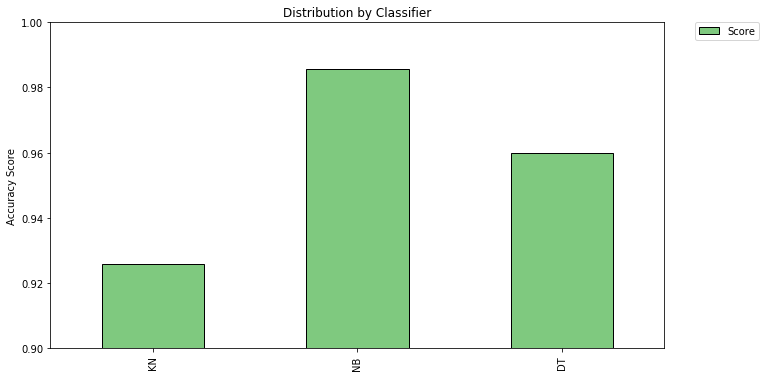

In [95]:
df.plot(kind='bar', ylim=(0.9, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(3), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## What about Message length?

In [96]:
# add feature: message length
sms['length'] = sms['message'].apply(len)
sms.head()


,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# lengthier msg = likely a spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DABA4F550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021DA96CD0B8>], dtype=object)

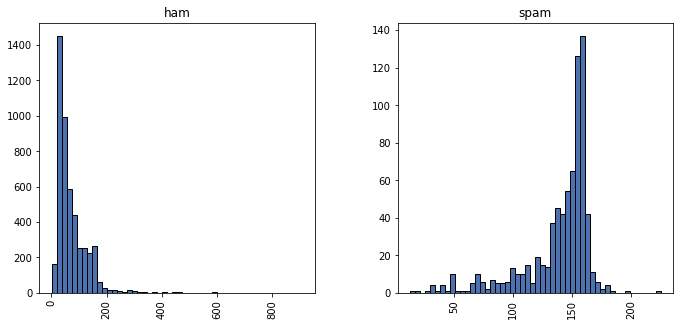

In [97]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-deep')
sms.hist(column='length', by='class', bins=50, figsize=(11, 5))


## append message length feature to the matrix we fit into our classifiers

In [98]:
lf = sms['length'].as_matrix()
newfeat = np.hstack((features.todense(), lf[:, None]))


In [99]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['class'], test_size=0.3,
                                                                            random_state=111)


In [100]:
pred_scores = []
for k, v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v, features_test)
    pred_scores.append((k, [accuracy_score(labels_test, pred)]))


## Every classifier doing a bit worse

In [101]:
df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
KN,0.925837,0.888158
NB,0.985646,0.982656
DT,0.959928,0.956340


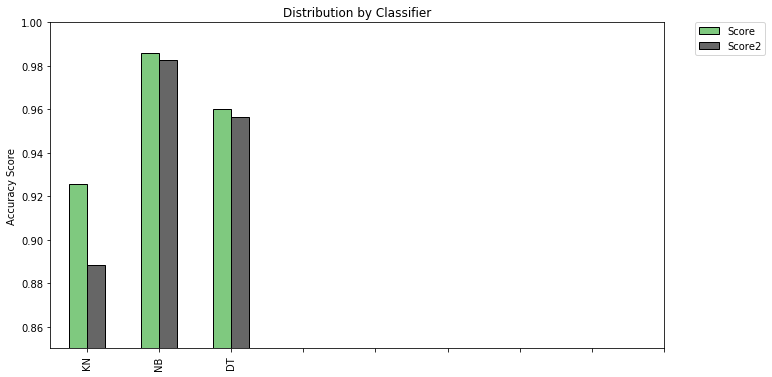

In [102]:
df.plot(kind='bar', ylim=(0.85, 1.0), figsize=(11, 6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
